In the Multi-Armed Bandit problem, an agent is presented with multiple options (arms), each providing a reward drawn from an unknown probability distribution. The agent aims to maximize the cumulative reward over a series of trials. The challenge lies in choosing the best arm to pull, balancing the need to explore different arms to learn about their reward distributions and exploiting the known arms that have provided high rewards.

# 🎰 Epsilon-Greedy Algorithm

## 🧠 Overview
The **epsilon-greedy algorithm** is one of the simplest strategies for solving the **Multi-Armed Bandit (MAB)** problem.  
It helps balance **exploration** (trying new actions) and **exploitation** (choosing the best-known action).

---

## ⚙️ Working Principle

- With **probability ϵ (epsilon)** → **Explore** a random arm.  
- With **probability (1 − ϵ)** → **Exploit** the arm with the highest estimated reward.

---

## 🪜 Algorithm Steps

1. **Initialize** the estimated values of all arms to zero or a small positive number.  
2. For each trial:
   - Generate a random number between 0 and 1.
   - If the number is **less than ϵ**, select a **random arm** (exploration).
   - Otherwise, select the **arm with the highest estimated reward** (exploitation).
   - **Update** the estimated reward of the selected arm based on the observed reward.

---

## 💻 Python Implementation

This implementation demonstrates the **Epsilon-Greedy** algorithm for solving the **Multi-Armed Bandit (MAB)** problem.  
It shows how an agent can balance exploration and exploitation to maximize its cumulative reward.

### 🎯 Objectives
- **Simulate the Multi-Armed Bandit Problem:**  
  The agent must decide which of several slot machines (arms) to pull in order to maximize total reward.
  
- **Implement the Epsilon-Greedy Algorithm:**  
  A simple yet effective approach to balance exploration and exploitation.
  
- **Evaluate Performance:**  
  Track the **total reward** accumulated over multiple trials to measure the effectiveness of the strategy.

---

```python
import numpy as np
import matplotlib.pyplot as plt

# Number of arms
n_arms = 5
# Number of trials
n_trials = 1000
# Epsilon value
epsilon = 0.1

# True rewards for each arm (unknown to agent)
true_rewards = np.random.randn(n_arms)

# Estimated rewards
estimated_rewards = np.zeros(n_arms)
# Count of times each arm is pulled
arm_counts = np.zeros(n_arms)

# Track total rewards
total_reward = 0
reward_history = []

for t in range(n_trials):
    # Exploration or exploitation
    if np.random.rand() < epsilon:
        arm = np.random.randint(n_arms)  # Explore
    else:
        arm = np.argmax(estimated_rewards)  # Exploit

    # Simulated reward (with noise)
    reward = true_rewards[arm] + np.random.randn() * 0.1
    total_reward += reward

    # Update estimates
    arm_counts[arm] += 1
    estimated_rewards[arm] += (reward - estimated_rewards[arm]) / arm_counts[arm]
    reward_history.append(total_reward)

# Plot results



Total Reward: 5.877342135478806


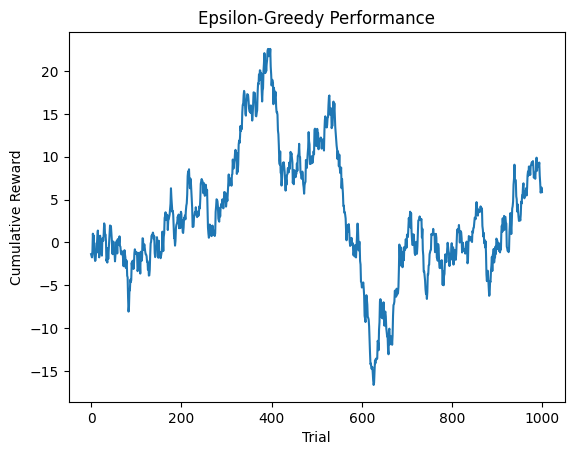

In [6]:
import numpy as np
import matplotlib.pyplot as plt
class EpsilonGreedy:
    def __init__(self, n_arms, epsilon):
        self.n_arms = n_arms
        self.epsilon = epsilon
        self.counts = np.zeros(n_arms)  # Number of times each arm is pulled
        self.values = np.zeros(n_arms)  # Estimated values of each arm

    def select_arm(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, self.n_arms)
        else:
            return np.argmax(self.values)

    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] += 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        self.values[chosen_arm] = ((n - 1) / n) * value + (1 / n) * reward

# Example usage
n_arms = 10
epsilon = 0.1
n_trials = 1000
rewards = np.random.randn(n_arms, n_trials)  # Random rewards for demonstration

agent = EpsilonGreedy(n_arms, epsilon)
total_reward = 0
cumulative_rewards = []

for t in range(n_trials):
    arm = agent.select_arm()
    reward = rewards[arm, t]
    agent.update(arm, reward)
    total_reward += reward
    cumulative_rewards.append(total_reward)

print("Total Reward:", total_reward)

plt.plot(np.arange(n_trials), cumulative_rewards)
plt.xlabel("Trial")
plt.ylabel("Cumulative Reward")
plt.title("Epsilon-Greedy Performance")
plt.show()

# 2. Upper Confidence Bound (UCB)
The UCB algorithm is based on the principle of optimism in the face of uncertainty. It selects the arm with the highest upper confidence bound, balancing the estimated reward and the uncertainty of the estimate.

Total Reward (UCB): 8.858990410349776


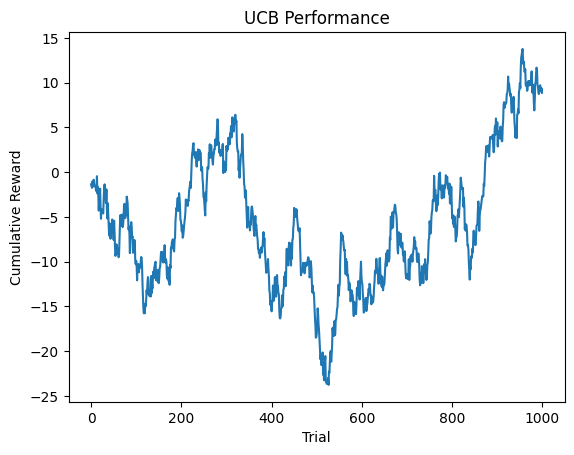

In [9]:
class UCB:
    def __init__(self, n_arms):
        self.n_arms = n_arms
        self.counts = np.zeros(n_arms)
        self.values = np.zeros(n_arms)
        self.total_counts = 0

    def select_arm(self):
        ucb_values = self.values + np.sqrt(2 * np.log(self.total_counts + 1) / (self.counts + 1e-5))
        return np.argmax(ucb_values)

    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] += 1
        self.total_counts += 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        self.values[chosen_arm] = ((n - 1) / n) * value + (1 / n) * reward

# Example usage and visualization
agent_ucb = UCB(n_arms)
total_reward_ucb = 0
cumulative_rewards_ucb = []

for t in range(n_trials):
    arm = agent_ucb.select_arm()
    reward = rewards[arm, t]
    agent_ucb.update(arm, reward)
    total_reward_ucb += reward
    cumulative_rewards_ucb.append(total_reward_ucb)

print("Total Reward (UCB):", total_reward_ucb)

plt.plot(np.arange(n_trials), cumulative_rewards_ucb)
plt.xlabel("Trial")
plt.ylabel("Cumulative Reward")
plt.title("UCB Performance")
plt.show()

# 3. Thompson Sampling
Thompson Sampling is a Bayesian approach to the MAB problem. It maintains a probability distribution for the reward of each arm and selects arms based on samples from these distributions.

Total Reward (Thompson Sampling): 21.587414204783702


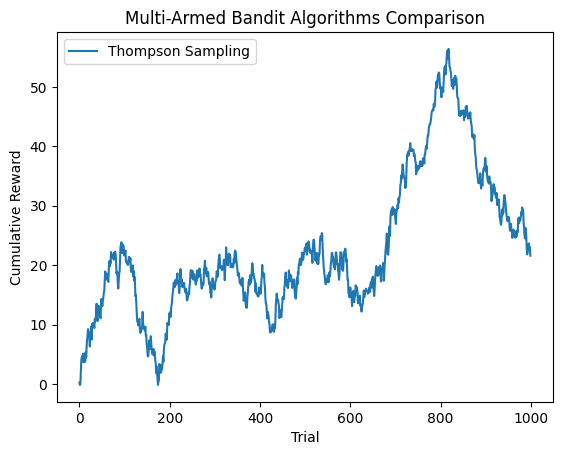

In [ ]:
class ThompsonSampling:
    def __init__(self, n_arms):
        self.n_arms = n_arms
        self.successes = np.zeros(n_arms)
        self.failures = np.zeros(n_arms)

    def select_arm(self):
        sampled_values = np.random.beta(self.successes + 1, self.failures + 1)
        return np.argmax(sampled_values)

    def update(self, chosen_arm, reward):
        if reward > 0:
            self.successes[chosen_arm] += 1
        else:
            self.failures[chosen_arm] += 1

# Visualization and comparison
agent_ts = ThompsonSampling(n_arms)
total_reward_ts = 0
cumulative_rewards_ts = []

for t in range(n_trials):
    arm = agent_ts.select_arm()
    reward = rewards[arm, t]
    agent_ts.update(arm, reward)
    total_reward_ts += reward
    cumulative_rewards_ts.append(total_reward_ts)

print("Total Reward (Thompson Sampling):", total_reward_ts)

plt.plot(np.arange(n_trials), cumulative_rewards_ts, label="Thompson Sampling")
plt.xlabel("Trial")
plt.ylabel("Cumulative Reward")
plt.title("Multi-Armed Bandit Algorithms Comparison")
plt.legend()
plt.show()

Comparision

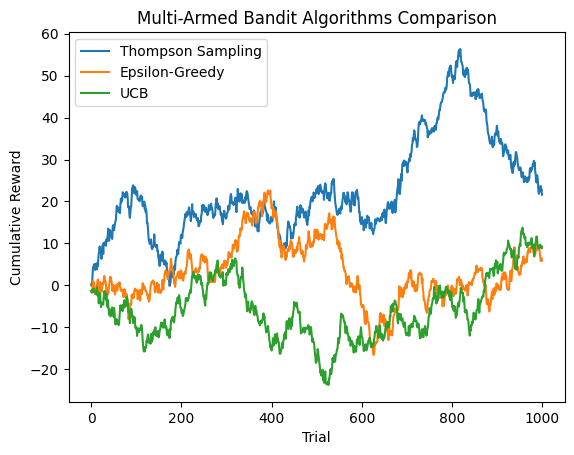

In [13]:
plt.plot(np.arange(n_trials), cumulative_rewards_ts, label="Thompson Sampling")
plt.plot(np.arange(n_trials), cumulative_rewards, label="Epsilon-Greedy")
plt.plot(np.arange(n_trials), cumulative_rewards_ucb, label="UCB")
plt.xlabel("Trial")
plt.ylabel("Cumulative Reward")
plt.title("Multi-Armed Bandit Algorithms Comparison")
plt.legend()
plt.show()


--- Simulation Results ---
Top Banner: estimated CTR = 0.0528, true CTR = 0.0500, chosen 246 times
Sidebar: estimated CTR = 0.0560, true CTR = 0.0800, chosen 268 times
Footer: estimated CTR = 0.0000, true CTR = 0.0300, chosen 43 times
Pop-up: estimated CTR = 0.0519, true CTR = 0.0600, chosen 443 times

Total Clicks: 51
Overall Estimated CTR: 0.0510


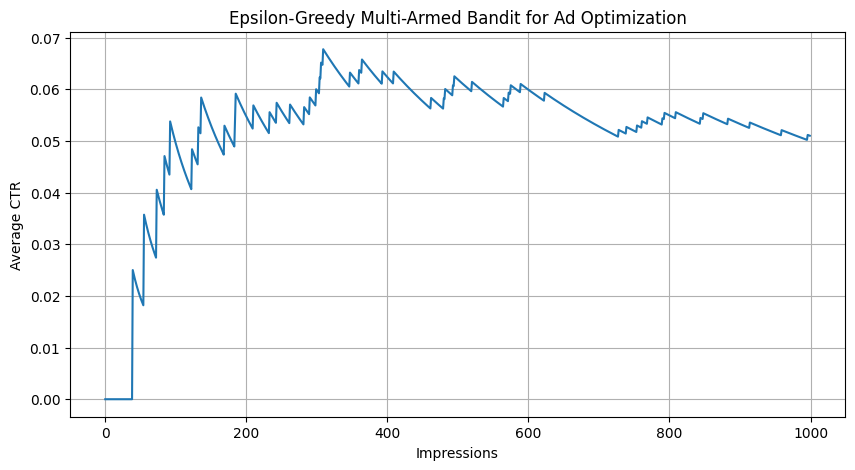

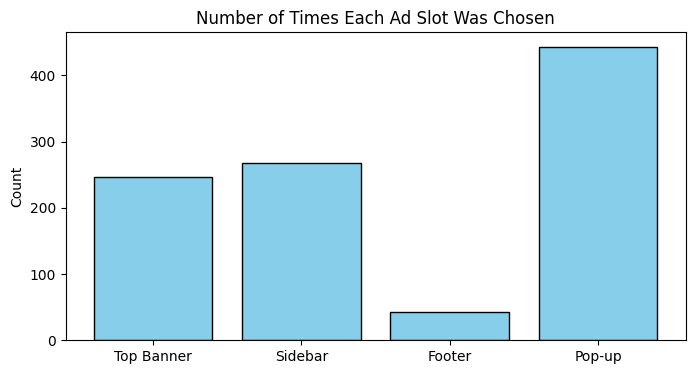

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# 🧠 Problem Setup
# -------------------------------

# We have 4 ad slots (arms of the bandit)
ad_slots = ["Top Banner", "Sidebar", "Footer", "Pop-up"]
n_arms = len(ad_slots)

# Simulated "true" click-through rates (CTR) for each ad slot (hidden from the algorithm)
# These represent the real probability of getting a click
true_ctrs = [0.05, 0.08, 0.03, 0.06]  # for example

# Number of total impressions (trials)
n_impressions = 1000

# Epsilon (exploration rate)
epsilon = 0.2  # 20% exploration, 80% exploitation

# -------------------------------
# 🧩 Epsilon-Greedy Algorithm Setup
# -------------------------------

# Estimated CTRs (initially zero)
estimated_ctrs = np.zeros(n_arms)

# Count of times each ad slot has been shown
slot_counts = np.zeros(n_arms)

# Track total rewards and average CTR
total_clicks = 0
ctr_history = []

# -------------------------------
# 🚀 Simulation
# -------------------------------
for t in range(n_impressions):
    # Decide whether to explore or exploit
    if np.random.rand() < epsilon:
        # Explore: pick a random ad slot
        chosen_arm = np.random.randint(n_arms)
    else:
        # Exploit: pick the ad slot with the highest estimated CTR
        chosen_arm = np.argmax(estimated_ctrs)
    
    # Simulate user behavior: click (1) or no click (0)
    # based on the true CTR of the chosen slot
    reward = np.random.rand() < true_ctrs[chosen_arm]
    
    # Update total clicks
    total_clicks += reward
    
    # Increment the count for the chosen slot
    slot_counts[chosen_arm] += 1
    
    # Update estimated CTR using incremental average
    estimated_ctrs[chosen_arm] += (reward - estimated_ctrs[chosen_arm]) / slot_counts[chosen_arm]
    
    # Track average CTR over time
    ctr_history.append(total_clicks / (t + 1))

# -------------------------------
# 📊 Results and Visualization
# -------------------------------
print("\n--- Simulation Results ---")
for i in range(n_arms):
    print(f"{ad_slots[i]}: estimated CTR = {estimated_ctrs[i]:.4f}, true CTR = {true_ctrs[i]:.4f}, chosen {int(slot_counts[i])} times")

print(f"\nTotal Clicks: {int(total_clicks)}")
print(f"Overall Estimated CTR: {total_clicks / n_impressions:.4f}")

# Plotting performance
plt.figure(figsize=(10, 5))
plt.plot(ctr_history)
plt.xlabel("Impressions")
plt.ylabel("Average CTR")
plt.title("Epsilon-Greedy Multi-Armed Bandit for Ad Optimization")
plt.grid(True)
plt.show()

# Bar plot for comparison
plt.figure(figsize=(8, 4))
plt.bar(ad_slots, slot_counts, color='skyblue', edgecolor='black')
plt.title("Number of Times Each Ad Slot Was Chosen")
plt.ylabel("Count")
plt.show()


 Using Mabwiser Libarary


--- MABWiser Epsilon-Greedy Results ---


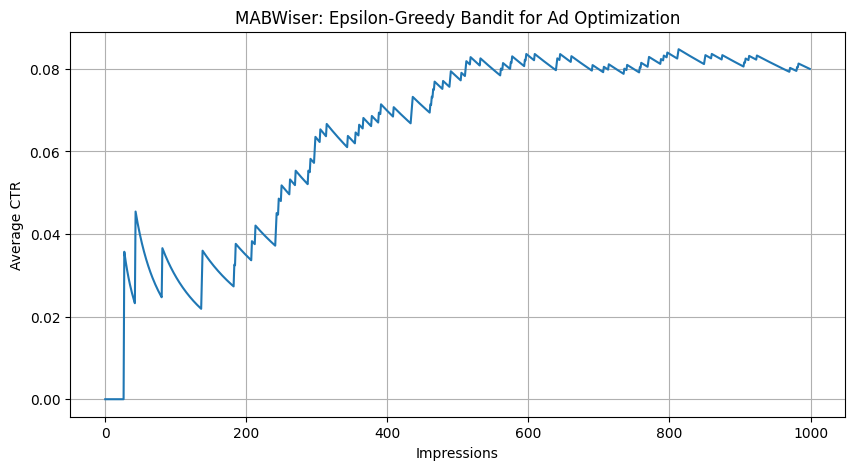

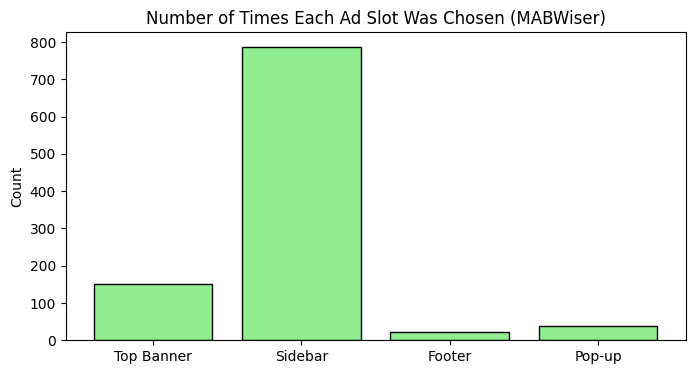

In [12]:
# pip install mabwiser matplotlib

import numpy as np
import matplotlib.pyplot as plt
from mabwiser.mab import MAB, LearningPolicy

# -------------------------------
# 🎯 Problem Setup
# -------------------------------

ad_slots = ["Top Banner", "Sidebar", "Footer", "Pop-up"]
true_ctrs = [0.05, 0.08, 0.03, 0.06]
n_impressions = 1000

# -------------------------------
# ⚙️ MABWiser Epsilon-Greedy Setup
# -------------------------------

# Create a bandit with epsilon-greedy learning policy
mab = MAB(
    arms=ad_slots,
    learning_policy=LearningPolicy.EpsilonGreedy(epsilon=0.1)
)

# Initialize data tracking
decisions, rewards = [], []
ctr_history = []
total_clicks = 0

# -------------------------------
# 🚀 Simulation Loop
# -------------------------------
for t in range(n_impressions):
    # On the first round, pick a random arm (no data to fit yet)
    if len(decisions) == 0:
        chosen_arm = np.random.choice(ad_slots)
    else:
        # Fit MAB model on past data
        mab.fit(decisions, rewards)
        # Predict the best arm for current round
        chosen_arm = mab.predict()
    
    # Simulate reward (click = 1, no click = 0)
    reward = np.random.rand() < true_ctrs[ad_slots.index(chosen_arm)]
    
    # Store decision & reward
    decisions.append(chosen_arm)
    rewards.append(int(reward))
    total_clicks += reward
    
    # Track average CTR
    ctr_history.append(total_clicks / (t + 1))

# -------------------------------
# 📊 Results & Visualization
# -------------------------------
# Ensure decisions and rewards are 1D lists (not arrays of arrays)
mab.fit(list(decisions), list(rewards))
# estimated_ctrs = [mab.predict(arm) for arm in ad_slots]
slot_counts = [decisions.count(arm) for arm in ad_slots]

print("\n--- MABWiser Epsilon-Greedy Results ---")
# for i, arm in enumerate(ad_slots):
    # print(f"{arm}: estimated CTR = {estimated_ctrs[i]:.4f}, true CTR = {true_ctrs[i]:.4f}, chosen {slot_counts[i]} times")

# print(f"\nTotal Clicks: {int(total_clicks)}")
# print(f"Overall Estimated CTR: {total_clicks / n_impressions:.4f}")

# Plot CTR trend
plt.figure(figsize=(10, 5))
plt.plot(ctr_history)
plt.xlabel("Impressions")
plt.ylabel("Average CTR")
plt.title("MABWiser: Epsilon-Greedy Bandit for Ad Optimization")
plt.grid(True)
plt.show()

# Plot chosen arms
plt.figure(figsize=(8, 4))
plt.bar(ad_slots, slot_counts, color='lightgreen', edgecolor='black')
plt.title("Number of Times Each Ad Slot Was Chosen (MABWiser)")
plt.ylabel("Count")
plt.show()
